In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px

In [3]:
churn_data=pd.read_csv('churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### 9.1. 
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

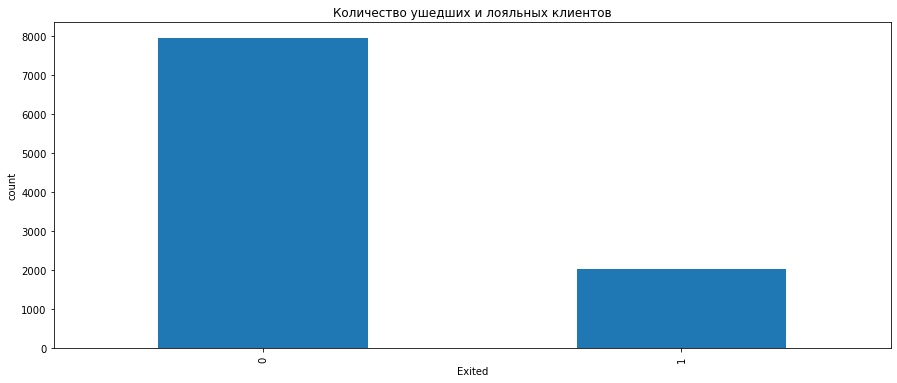

In [4]:
df=churn_data.groupby(by='Exited')['Exited'].count()
df.plot(
    kind='bar',
    figsize=(15, 6),
    title='Количество ушедших и лояльных клиентов',
    ylabel='count'
);

In [5]:
print(f'Cоотношение ушедших и лояльных клиентов {round(df[1]/df[0], 2)}')

Cоотношение ушедших и лояльных клиентов 0.26


Из графика видно, что количество ушедших клиентов составляет примерно четверть от лояльных 

#### 9.2. 
Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

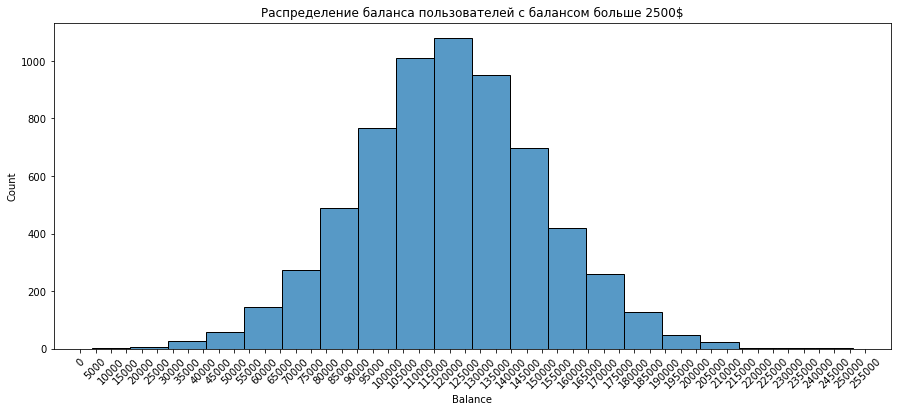

In [6]:
df=churn_data[churn_data['Balance']>2500]
fig=plt.figure(figsize=(15,6))
hist=sns.histplot(
    data=df,
    x='Balance',
    bins=20
)
hist.xaxis.set_tick_params(rotation=45)
#hist.grid()
hist.set_title('Распределение баланса пользователей с балансом больше 2500$')
hist.set_xticks(range(0,260000,5000));

Баланс расматриваемых пользователей находится в диапозоне от 3700 до 250000$, самая распространенная сумма порядка 120000$. Распределение напоминает нормальное.

#### 9.3. 
Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

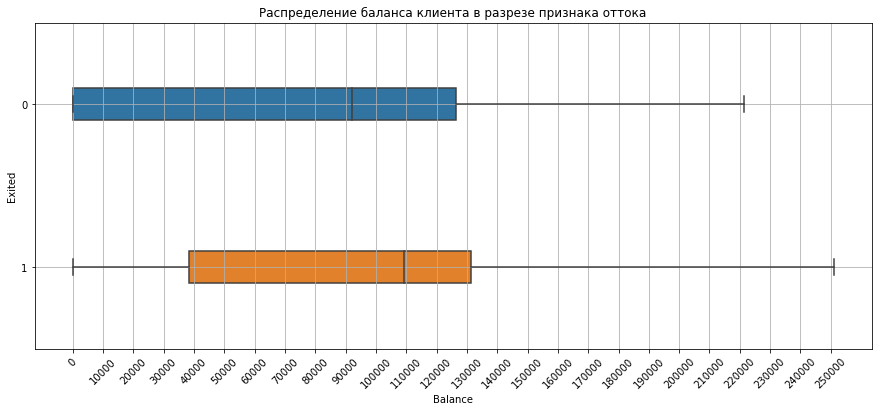

In [7]:
fig=plt.figure(figsize=(15,6))
box=sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    width=0.2,
    orient='h'
)
box.xaxis.set_tick_params(rotation=45)
box.grid()
box.set_title('Распределение баланса клиента в разрезе признака оттока')
box.set_xticks(range(0,260000,10000));

Разброс сумм у ушедших клиентов меньше лояльных, медиана у ушедших также больше -порядка 110 тысяч, против 90 тысяч у лояльных клиентов. Возможно отток связан с тем, что условия для клиентов с таким балансом не выгодны для клиентов.

#### 9.4. 
Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

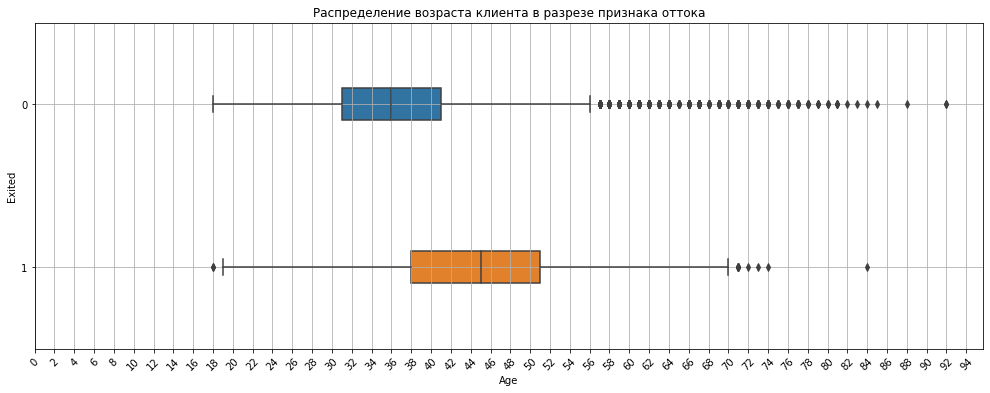

In [8]:
fig=plt.figure(figsize=(17,6))
box=sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    width=0.2,
    orient='h'
)
box.xaxis.set_tick_params(rotation=45)
box.grid()


box.set_title('Распределение возраста клиента в разрезе признака оттока')
box.set_xticks(range(0, 96, 2));

Из графика видно, что в груаае лояльных клиентов больше потенциальных вбросов.Для снижения отттоков клиентов банку слудует обратить внимание на возрастную категорию от 38 до 51 лет.

#### 9.5. 
Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [16]:
fig=px.scatter(
    data_frame=churn_data,
    x='EstimatedSalary',
    y='CreditScore',
    log_x=True,
    log_y=True,
    color='Exited',
    title='Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты'
)
#import plotly.io as pio
#pio.show(fig)
#fig.show('png')
#$ pip install -U kaleido
fig.write_image('img.png')


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


Какой-либо зависимости между признаками не прослеживается. Ни в обычном, не в логорифмическом масштабе.

#### 9.6. 
Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [ ]:
df=churn_data.groupby(by='Gender', as_index=False)['Exited'].mean()
df['Exited']=df['Exited']*100
pie=px.pie(
    data_frame=df,
    values="Exited",
    names='Gender',
    title='Отток клиентов по гендерному признаку',
    height=400,
    width=500
)
pie.show()

Чаще уходят женщины - 60% против 40% мужчин

#### 9.7. 
Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [ ]:
df=churn_data
df['count']=df['Exited']
df=df.groupby(by=['NumOfProducts', 'Exited'], as_index=False)['RowNumber'].count()
bar=px.bar(
    data_frame=df,
    x='NumOfProducts',
    y='RowNumber',
    color='Exited',
    width=600,
    height=450,
    title='Отток количества клиентов от числа приобретённых у банка услуг',
    text='Exited'
)
bar.show()

Самый минимальный оттток при использовании 2 продуктовБ далее с увеличением количества продуктов идет увеличение и оттока

#### 9.8. 
Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [ ]:
df=churn_data.groupby(by=['IsActiveMember', 'Exited'], as_index=False)['RowNumber'].count()
display(df)
bar=px.bar(
    data_frame=df,
    x='IsActiveMember',
    y='RowNumber',
    color='Exited',
    text='Exited',
    width=550,
    height=450,
    title='Влияние наличие статуса активного клиента на отток клиентов'
)
bar.show()

,IsActiveMember,Exited,RowNumber
0,0,0,3547
1,0,1,1302
2,1,0,4416
3,1,1,735


In [ ]:
df=churn_data.groupby(by=['IsActiveMember', 'Exited'], as_index=False)['RowNumber'].count()
df['IsActiveMember']=df['IsActiveMember'].apply(lambda x:"Active member" if x==1 else "No active")
df['Exited']=df['Exited'].apply(lambda x: 'exited' if x==1 else 'No exited')
fig=px.sunburst(
    data_frame=df,
    path=['IsActiveMember', 'Exited'],
    values='RowNumber',
    width=550,
    height=450,
    color_continuous_scale=True
)
fig.show()

В группе клиентов с активным статусом отток ниже. В качестве рекоммнедации барку для снижения оттока я бы рекомендовала увеличивать группу активных клиентов.

#### 9.9. 
В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [ ]:
df=churn_data.groupby(by='Geography', as_index=False).mean()
display(df)
fig=px.choropleth(
    data_frame=df,
    locations='Geography',
    locationmode='country names',
    color='Exited',
    width=700,
    height=500,
    title='Отток клиентов на карте мира'
)
fig.show()

,Geography,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,France,5025.228560,1.569065e+07,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
1,Germany,5000.278996,1.569056e+07,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
2,Spain,4950.667743,1.569192e+07,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


В Германии отток клиентов выше. Возможно это связано с балансом на счетах клиентовю Как мы показывали в задании 9.3 у ушедших клиентов медиана баланса значительно превышала медиану баланса лояльных.

#### 9.10. 
Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [ ]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [ ]:
churn_data['CreditScoreCat']=churn_data['CreditScore'].apply(get_credit_score_cat)
pt=churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure'
)
fig=px.imshow(
    pt,
    width=700,
    height=500,
    title='Тепловая карта оттока клиентов'
)
fig.show()

Самый высокий отток у клиентов с самым низким кредитным рейтингом (Very_Poor) и самым низким количеством лет, в течении которых клиент пользуется услугами банка (Tenure=0) и у клиентов с кредитным рейтингом Very_Poor и Tenure=1-